In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from dateutil import relativedelta
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/victorvulovic/anaconda/envs/dsci6007/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['relativedelta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
col_names = ['customer_id','amount','date']
original_df = pd.read_csv('purchases.txt',delimiter='\t',names=col_names)
original_df.date = pd.to_datetime(original_df['date']) ## datetime
original_df['month'] = pd.DatetimeIndex(original_df['date']).month ## add in month
original_df['year'] = pd.DatetimeIndex(original_df['date']).year ## add in year
original_df.date = pd.DatetimeIndex(original_df['date'])
##days
start_date = datetime.datetime(2016,1,1)
original_df['days_since_purchase'] = start_date -original_df.date  ## days since last purchase for each purchase


In [3]:
#http://stackoverflow.com/questions/4039879/best-way-to-find-the-months-between-two-dates
def diff_month(d1, d2):
    return (d1.year - d2.year)*12 + d1.month - d2.month
def diff_year(d1, d2):
    return (d1.year - d2.year)

In [4]:
#Months
original_df['months_since_purchase']=original_df.date.apply(lambda x: diff_month(start_date,x))
#Year
original_df['years_since_purchase']=original_df.date.apply(lambda x: diff_year(start_date,x))


In [5]:
## Get quarters (three months = 1 quarter)
original_df['quarters_since_purchase'] = round(original_df.months_since_purchase/3)

TypeError: cannot convert the series to <type 'float'>

In [37]:
original_df['date'][0] - start_date

Timedelta('-2247 days +00:00:00')

In [6]:
original_df.head(15)

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase
0,760,25.0,2009-11-06,11,2009,2247 days,74,7
1,860,50.0,2012-09-28,9,2012,1190 days,40,4
2,1200,100.0,2005-10-25,10,2005,3720 days,123,11
3,1420,50.0,2009-07-09,7,2009,2367 days,78,7
4,1940,70.0,2013-01-25,1,2013,1071 days,36,3
5,1960,40.0,2013-10-29,10,2013,794 days,27,3
6,2620,30.0,2006-03-09,3,2006,3585 days,118,10
7,3050,50.0,2007-04-12,4,2007,3186 days,105,9
8,3120,150.0,2006-11-08,11,2006,3341 days,110,10
9,3260,45.0,2010-10-20,10,2010,1899 days,63,6


In [7]:
## Create indicators for our state
original_df['state_one'] = original_df.years_since_purchase.apply(lambda x: 3-x) >=0
original_df['state_two'] =  original_df.years_since_purchase.apply(lambda x: x>3 and x<=6)
original_df['state_three'] =  original_df.years_since_purchase.apply(lambda x: x>6 and x<=9)

In [8]:
original_df.head()

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,state_one,state_two,state_three
0,760,25.0,2009-11-06,11,2009,2247 days,74,7,False,False,True
1,860,50.0,2012-09-28,9,2012,1190 days,40,4,False,True,False
2,1200,100.0,2005-10-25,10,2005,3720 days,123,11,False,False,False
3,1420,50.0,2009-07-09,7,2009,2367 days,78,7,False,False,True
4,1940,70.0,2013-01-25,1,2013,1071 days,36,3,True,False,False


In [9]:
original_df.sort_values(['days_since_purchase'],ascending=True)

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,state_one,state_two,state_three
47084,61320,60.00,2015-12-31,12,2015,1 days,1,1,True,False,False
18038,262610,150.00,2015-12-31,12,2015,1 days,1,1,True,False,False
24292,262590,50.00,2015-12-31,12,2015,1 days,1,1,True,False,False
50944,52080,60.00,2015-12-31,12,2015,1 days,1,1,True,False,False
46508,166400,25.00,2015-12-31,12,2015,1 days,1,1,True,False,False
47711,167840,50.00,2015-12-31,12,2015,1 days,1,1,True,False,False
43095,263430,50.00,2015-12-31,12,2015,1 days,1,1,True,False,False
41100,191960,20.00,2015-12-31,12,2015,1 days,1,1,True,False,False
41101,263600,16.00,2015-12-31,12,2015,1 days,1,1,True,False,False
47712,64860,30.00,2015-12-31,12,2015,1 days,1,1,True,False,False


In [35]:
## On average people make 2.78 purchases
print('Average purchases', np.mean(original_df.groupby(by=['customer_id']).count()['amount']))
# Median purcahses are 2.0
print('Median purchases', np.median(original_df.groupby(by=['customer_id']).count()['amount']))


('Average purchases', 2.7823749796383774)
('Median purchases', 2.0)


In [11]:
## Average number of months since purchase per customer id
avg_months_since_purchase_per_customer= original_df.groupby(by=['customer_id',])['months_since_purchase'].mean().reset_index()

In [12]:
print('Average months in-between purchases',np.mean(avg_months_since_purchase_per_customer.months_since_purchase))
print('Median number of months in-between purchases',np.median(avg_months_since_purchase_per_customer.months_since_purchase))

('Average months in-between purchases', 53.749820869899438)
('Median number of months in-between purchases', 51.666666666666664)


In [13]:
print('Average quarters in-between purchases',np.mean(original_df.quarters_since_purchase))
print('Median number quarters in-between purchases',np.median(original_df.quarters_since_purchase))

AttributeError: 'DataFrame' object has no attribute 'quarters_since_purchase'

In [14]:
print('Average years in-between purchases',np.mean(original_df.years_since_purchase))
print('Median years quarters in-between purchases',np.median(original_df.years_since_purchase))

('Average years in-between purchases', 5.1303007240013274)
('Median years quarters in-between purchases', 5.0)


In [15]:
truncated_avg_months_customer = avg_months_since_purchase_per_customer[avg_months_since_purchase_per_customer.months_since_purchase<150]

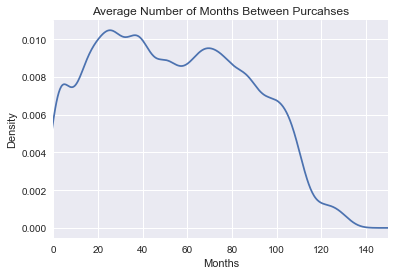

In [16]:
truncated_avg_months_customer.months_since_purchase.plot(kind='kde',xlim=[0,150])
plt.title('Average Number of Months Between Purcahses')
plt.xlabel('Months')

In [17]:
original_df.groupby(by=['customer_id'])['quarters_since_purchase'].mean().reset_index()['quarters_since_purchase'].plot(kind='kde',xlim=[0,40])
plt.title('Average Number Quarters Between Purchases')
plt.xlabel('Quarters')

KeyError: 'Column not found: quarters_since_purchase'

In [ ]:
original_df.groupby(by=['customer_id'])['years_since_purchase'].mean().reset_index()['years_since_purchase'].plot(kind='kde',xlim=[0,10])
plt.title('Average Number Years Between Purchases')
plt.xlabel('Years')

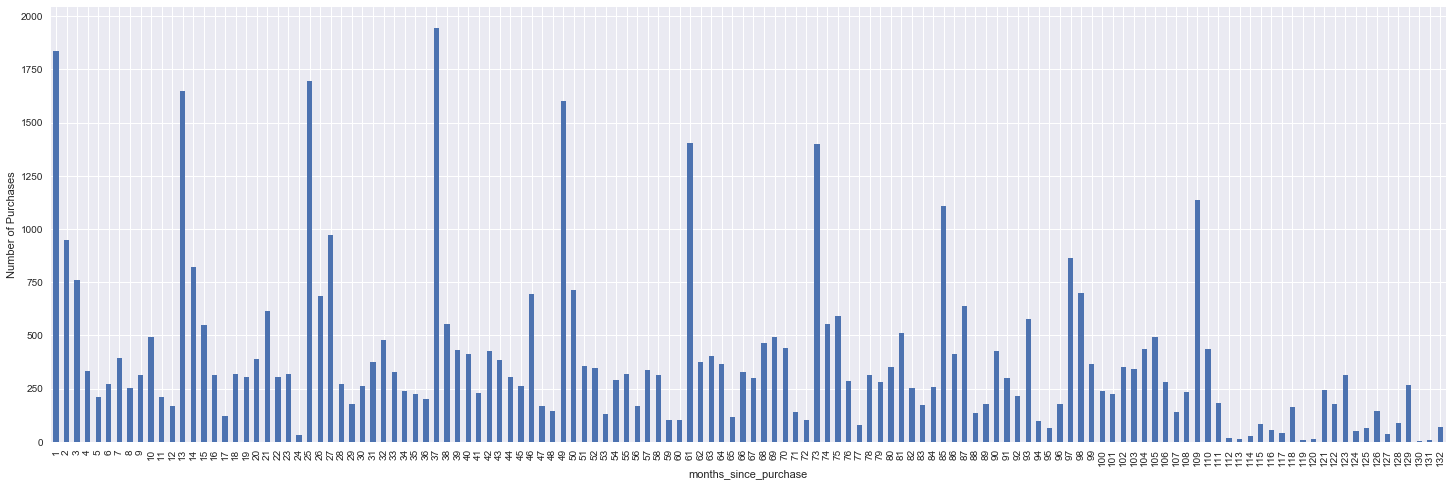

In [18]:
## Number of purchases per month total - not by unique customer id
original_df.groupby(by=['months_since_purchase']).count()['customer_id'].plot(kind='bar',figsize=([25,8]))
plt.ylabel('Number of Purchases')

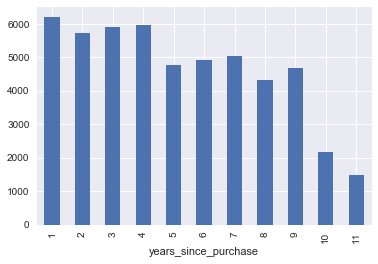

In [19]:
## Number of pruchases per year total - not by unique customer id
original_df.groupby(by=['years_since_purchase']).count()['customer_id'].plot(kind='bar')

In [20]:
cumulative_purchases_per_year = original_df.groupby(by=['years_since_purchase']).count()['customer_id'].apply(
lambda x: x/sum(original_df.groupby(by=['years_since_purchase']).count())).reset_index()

In [21]:
cumulative_purchases_per_year['running_total'] = cumulative_purchases_per_year.customer_id.cumsum()

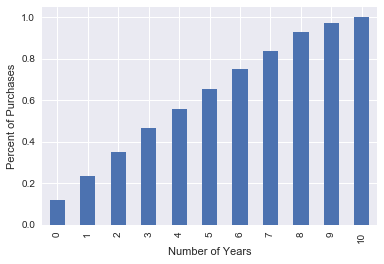

In [22]:
## Cumulative purchases over years

cumulative_purchases_per_year.running_total.plot(kind='bar')
plt.ylabel('Percent of Purchases')
plt.xlabel('Number of Years')

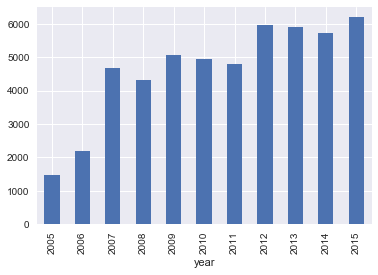

In [23]:
## Total number of purchases per year
original_df.groupby(['year']).count()['customer_id'].plot(kind='bar')

## Based on the above analysis, let us define a state as 36 months or three years (slightly less than the average time between transactions of ~50 months)
- Therefore, we will have three states in our transition matrix up to year nine (cutting out years 10 and 11)
- State One : <=3 years
- State Two : >3 years <= 6 years
- State Three : > 6 years <= 9 years

> Drop records that are 10 or 11 years since purchase

In [24]:
## drop these 
original_df[(original_df.state_one == False) &
            (original_df.state_two == False) &
                (original_df.state_three == False)]

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,state_one,state_two,state_three
2,1200,100.0,2005-10-25,10,2005,3720 days,123,11,False,False,False
6,2620,30.0,2006-03-09,3,2006,3585 days,118,10,False,False,False
8,3120,150.0,2006-11-08,11,2006,3341 days,110,10,False,False,False
12,4000,20.0,2005-11-25,11,2005,3689 days,122,11,False,False,False
16,4840,30.0,2005-10-14,10,2005,3731 days,123,11,False,False,False
17,4910,15.0,2006-12-13,12,2006,3306 days,109,10,False,False,False
19,4970,30.0,2006-12-01,12,2006,3318 days,109,10,False,False,False
20,5250,50.0,2005-12-20,12,2005,3664 days,121,11,False,False,False
22,5990,30.0,2006-03-17,3,2006,3577 days,118,10,False,False,False
23,6240,100.0,2006-11-09,11,2006,3340 days,110,10,False,False,False


In [25]:
indexes_to_drop = original_df[(original_df.state_one == False) &
            (original_df.state_two == False) &
                (original_df.state_three == False)].index

In [26]:
indexes_to_drop

Int64Index([    2,     6,     8,    12,    16,    17,    19,    20,    22,
               23,
            ...
            51088, 51089, 51098, 51109, 51143, 51151, 51164, 51175, 51176,
            51186],
           dtype='int64', length=3652)

In [214]:
# this drops the last years (with very few purchases)
state_df = original_df.drop(original_df.index[indexes_to_drop])

In [28]:
## Confirm we dropped everything correctly
state_df[(state_df.state_one == False) &
            (state_df.state_two == False) &
                (state_df.state_three == False)]

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,state_one,state_two,state_three


In [34]:
state_df.groupby(['customer_id']).apply(sort_index())

NameError: name 'sort_index' is not defined

In [30]:
state_df[state_df.customer_id==80]

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,state_one,state_two,state_three
11457,80,80.0,2011-08-05,8,2011,1610 days,53,5,False,True,False
11657,80,80.0,2013-08-07,8,2013,877 days,29,3,True,False,False
15624,80,60.0,2007-04-18,4,2007,3180 days,105,9,False,False,True
16131,80,80.0,2015-01-23,1,2015,343 days,12,1,True,False,False
45074,80,80.0,2014-03-05,3,2014,667 days,22,2,True,False,False
46422,80,70.0,2009-04-10,4,2009,2457 days,81,7,False,False,True


In [31]:
unique_customer_id = state_df.customer_id.unique()
unique_customer_id[0]

760

In [32]:
## Check number of customers where state is in last state

number_in_state_one = 0
number_in_state_two = 0
number_in_state_three = 0
number_of_customers = len(unique_customer_id)

# get number in state one
for customer in unique_customer_id:
    if state_df.state_one[(state_df['customer_id']==customer)].any() == True:
        number_in_state_one +=1
    else:
        pass
# get number in state two
for customer in unique_customer_id:
    if state_df.state_two[(state_df['customer_id']==customer)].any() == True:
        number_in_state_two +=1
    else:
        pass
# get number of customer in state three

for customer in unique_customer_id:
    if state_df.state_three[(state_df['customer_id']==customer)].any() == True:
        number_in_state_three +=1
    else:
        pass

In [33]:
state_df.groupby(['customer_id','state_one','state_two']).count().reset_index()[]

SyntaxError: invalid syntax (<ipython-input-33-7ff603f73874>, line 1)

In [ ]:
number_in_state_one

In [ ]:
state_df.state_three[(state_df['customer_id']==80)]

In [ ]:
state_df.groupby('state_one').count()['customer_id']

In [ ]:
## determine state one to state one probability
state_df.groupby('state_one').count()['customer_id']

# Find Amount 

In [70]:
amount_df = state_df.groupby('amount').count()['customer_id'].reset_index()

In [56]:
total_transactions = sum(state_df.groupby('amount').count()['customer_id'].reset_index()['customer_id'])

In [71]:
amount_df['relative_percent']=state_df.groupby('amount').count()['customer_id'].reset_index().customer_id/ total_transactions

In [76]:
amount_df['cumulative_percent']=amount_df.relative_percent.cumsum()

In [108]:
amount_df['total_purchases'] = amount_df['customer_id']

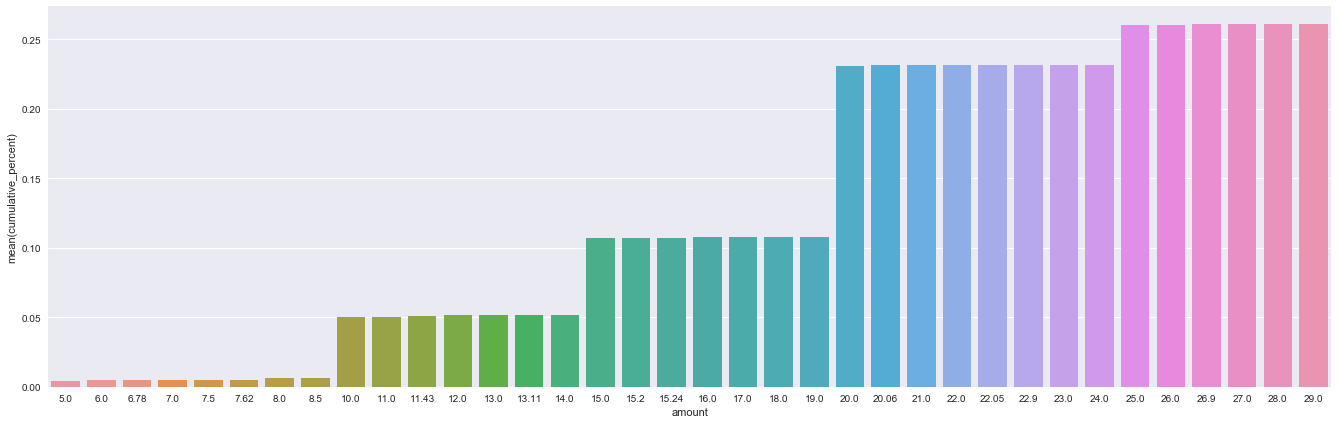

In [88]:
plt.figure(figsize=(23,7))
sns.barplot(x=amount_df.amount[amount_df.amount<30],y=amount_df.cumulative_percent)


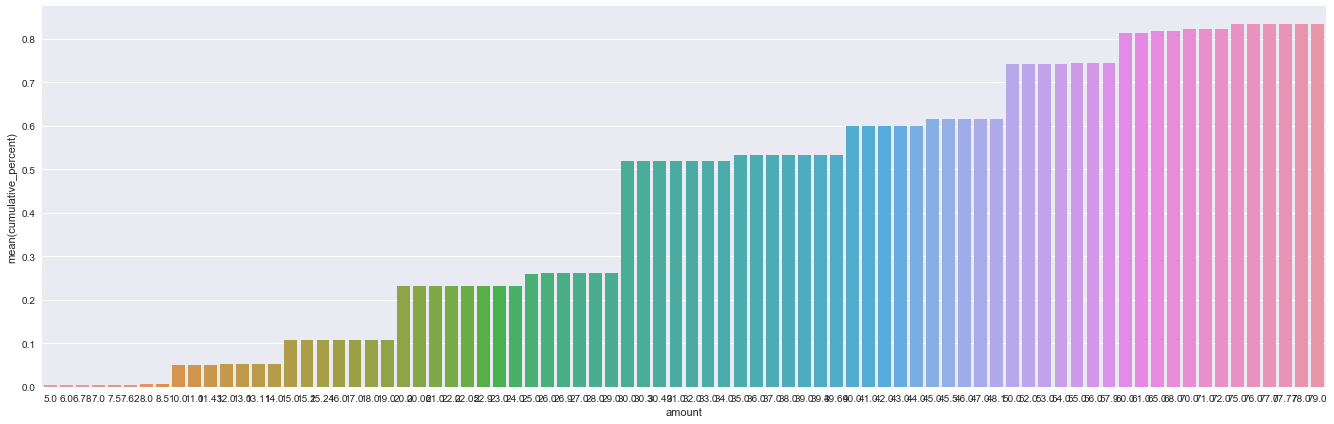

In [89]:
plt.figure(figsize=(23,7))
sns.barplot(x=amount_df.amount[amount_df.amount<80],y=amount_df.cumulative_percent)


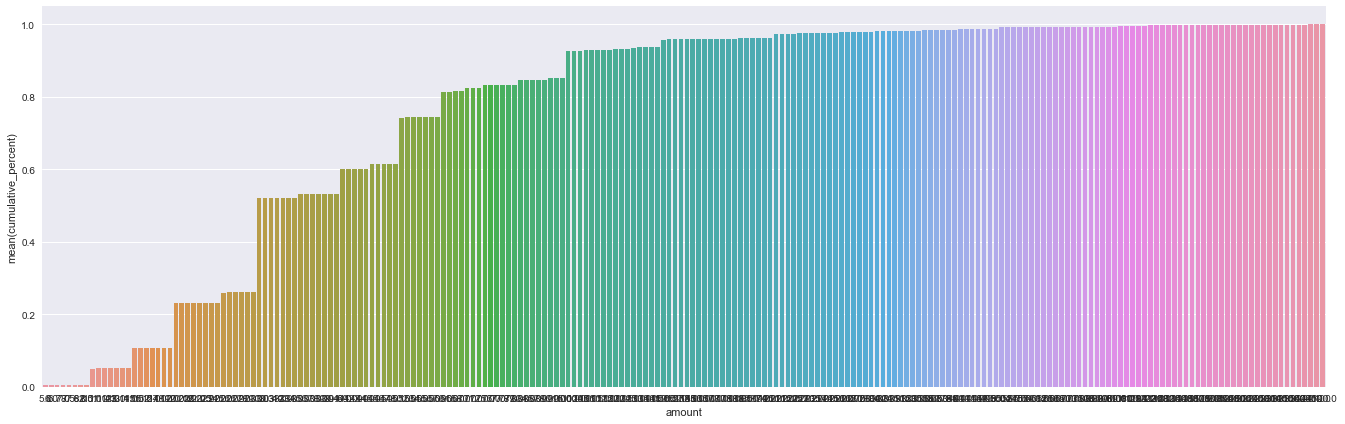

In [91]:
plt.figure(figsize=(23,7))
sns.barplot(x=amount_df.amount,y=amount_df.cumulative_percent)


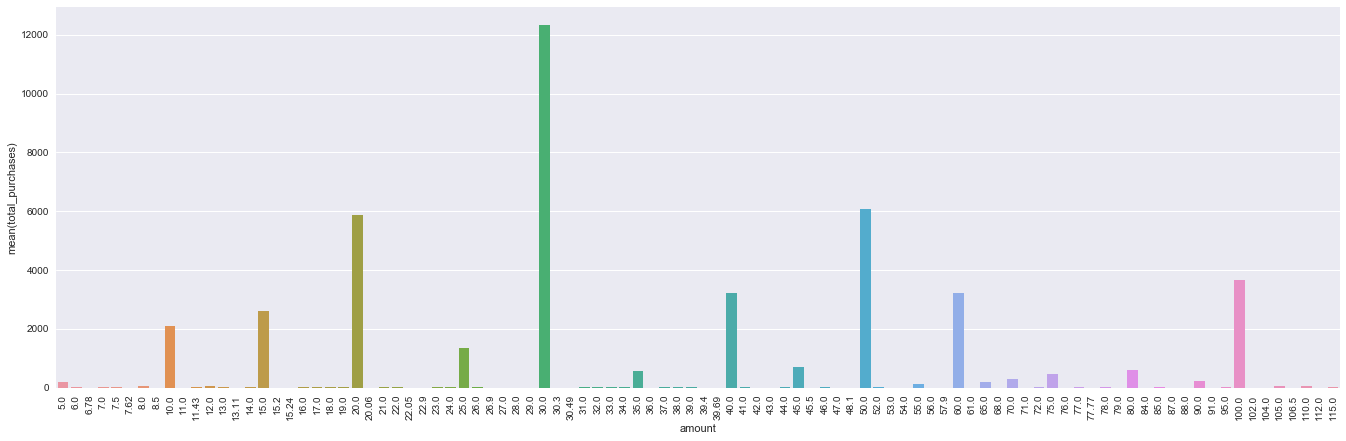

In [111]:
plt.figure(figsize=(23,7))
total = sns.barplot(x=amount_df.amount[amount_df.amount<120],y=amount_df.total_purchases)
for item in total.get_xticklabels():
    item.set_rotation(90)

total

#### most popular amount is \$30. We will segment into two cohorts: <\$30 and >\$30

# Frequency

In [113]:
frequency_df = state_df.groupby('customer_id').count().reset_index()

In [114]:
frequency_df.head()

,customer_id,amount,date,month,year,days_since_purchase,months_since_purchase,years_since_purchase,state_one,state_two,state_three
0,80,6,6,6,6,6,6,6,6,6,6
1,90,8,8,8,8,8,8,8,8,8,8
2,120,1,1,1,1,1,1,1,1,1,1
3,130,1,1,1,1,1,1,1,1,1,1
4,160,1,1,1,1,1,1,1,1,1,1


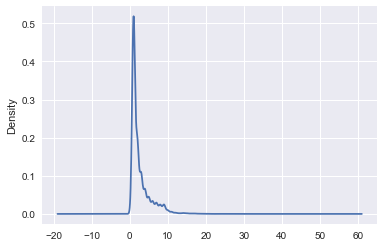

In [115]:
frequency_df.amount.plot(kind="kde")

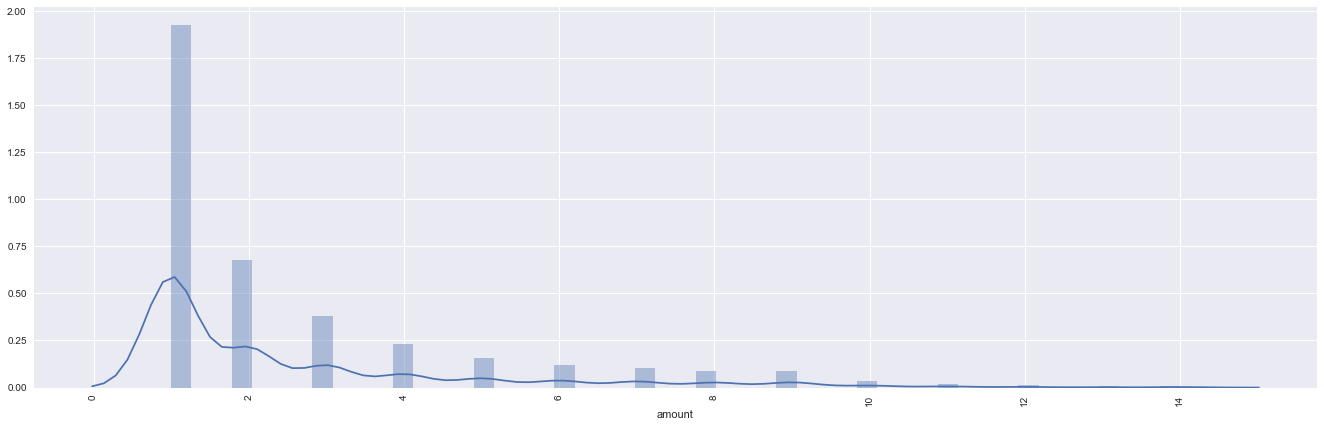

In [161]:
plt.figure(figsize=(23,7))
freq = sns.distplot(frequency_df.amount[frequency_df.amount<15])
for item in freq.get_xticklabels():
    item.set_rotation(90)

freq

#### most popular frequency is 1 purchase. We will segment into two cohorts: < 2 and > 2 purchase

# Recency Matrix 

In [163]:
recency_df = state_df.ix[state_df.groupby('customer_id').date.idxmax(), :]
recency_df.days_since_purchase = recency_df.days_since_purchase.apply(lambda x:x.days)

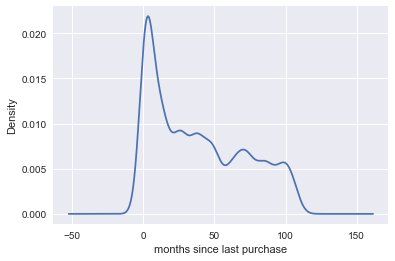

In [184]:
recency_df.months_since_purchase.plot(kind='kde')
plt.xlabel('months since last purchase')

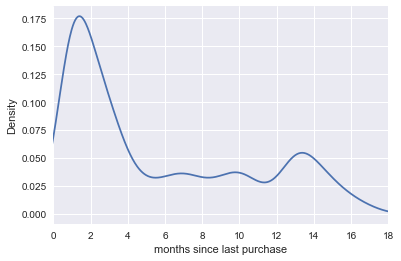

In [196]:
recency_df.months_since_purchase[recency_df.months_since_purchase<18].plot(kind='kde',xlim=[0,18])
plt.xlabel('months since last purchase')

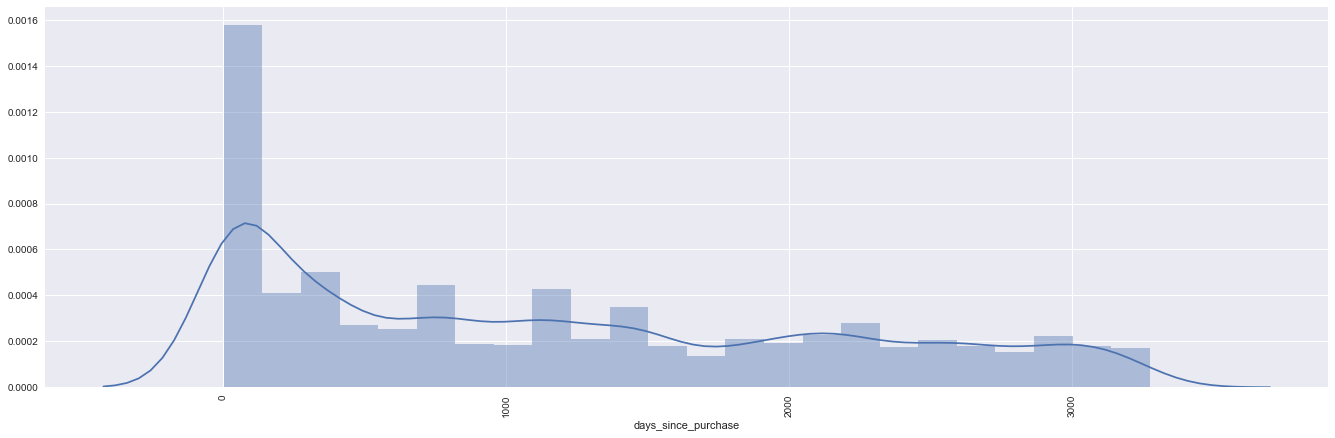

In [167]:
plt.figure(figsize=(23,7))
recency_plot = sns.distplot(recency_df.days_since_purchase)
for item in recency_plot.get_xticklabels():
    item.set_rotation(90)

recency_plot

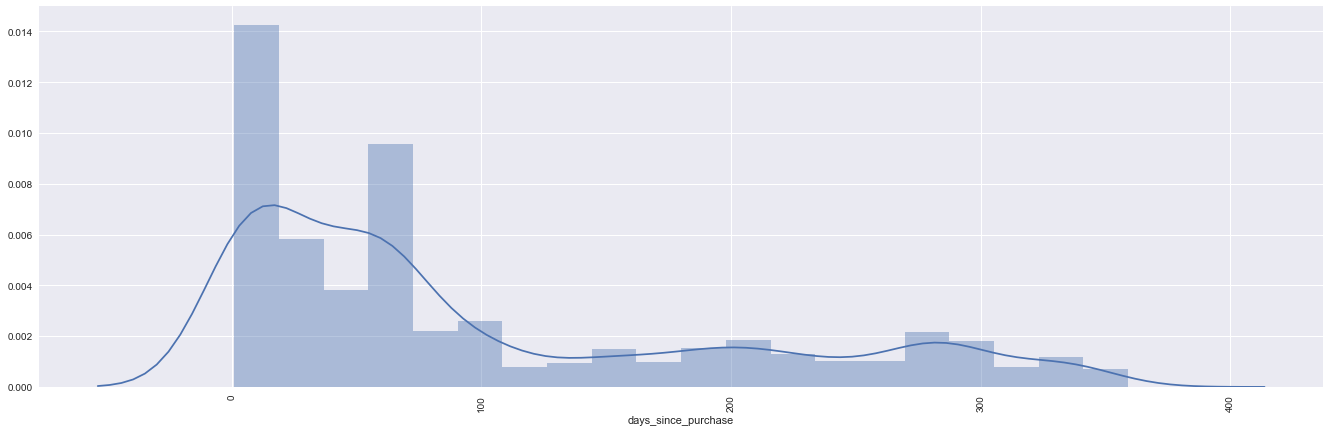

In [172]:
plt.figure(figsize=(23,7))
recency_plot = sns.distplot(recency_df.days_since_purchase[recency_df.days_since_purchase<360])
for item in recency_plot.get_xticklabels():
    item.set_rotation(90)

recency_plot

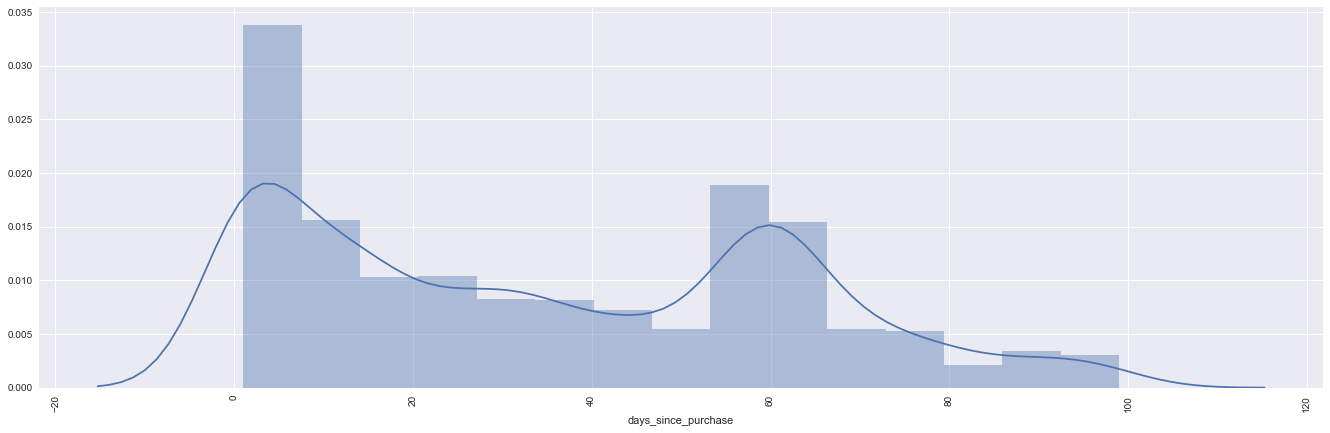

In [173]:
plt.figure(figsize=(23,7))
recency_plot = sns.distplot(recency_df.days_since_purchase[recency_df.days_since_purchase<100])
for item in recency_plot.get_xticklabels():
    item.set_rotation(90)

recency_plot

### Using days is too noisy, therefore let us use 12 months as the state segmentation

# Transition Matrix
- Start with recency

In [230]:
recency_df[(recency_df.months_since_purchase>12) & (recency_df.months_since_purchase<=24)]['customer_id'].count()

1958

In [240]:
# people who have purchase in last year
people_purchase_this_year = recency_df[recency_df.months_since_purchase<=12]['customer_id'].count()
people_purchase_year_two = recency_df[(recency_df.months_since_purchase>12) & (recency_df.months_since_purchase<=24)]['customer_id'].count()
people_purchase_year_three = recency_df[(recency_df.months_since_purchase>24) & (recency_df.months_since_purchase<=36)]['customer_id'].count()
people_purchase_year_four = recency_df[(recency_df.months_since_purchase>36) & (recency_df.months_since_purchase<=48)]['customer_id'].count()
people_purchase_year_five = recency_df[(recency_df.months_since_purchase>48) & (recency_df.months_since_purchase<=60)]['customer_id'].count()
people_purchase_year_six = recency_df[(recency_df.months_since_purchase>60) & (recency_df.months_since_purchase<=72)]['customer_id'].count()
people_purchase_year_seven = recency_df[(recency_df.months_since_purchase>72) & (recency_df.months_since_purchase<=84)]['customer_id'].count()
people_purchase_year_eight = recency_df[(recency_df.months_since_purchase>84) & (recency_df.months_since_purchase<=96)]['customer_id'].count()
people_purchase_year_nine = recency_df[(recency_df.months_since_purchase>96) & (recency_df.months_since_purchase<=108)]['customer_id'].count()


In [235]:
## make sure we are not missing any customers
len(state_df.customer_id.unique()) == total_customers 

True

In [215]:
total_customers = recency_df.customer_id.count()

In [245]:
state_probs = [float(people_purchase_this_year*1.0 / total_customers),
               float(people_purchase_year_two*1.0 / total_customers),
               float(people_purchase_year_three*1.0 / total_customers),
               float(people_purchase_year_four*1.0 / total_customers),
               float(people_purchase_year_five*1.0 / total_customers),
               float(people_purchase_year_six*1.0 / total_customers),
               float(people_purchase_year_seven*1.0 / total_customers),
               float(people_purchase_year_eight*1.0 / total_customers),
               float(people_purchase_year_nine*1.0 / total_customers)]

In [246]:
state_probs

[0.30464473164399797,
 0.1105028500479711,
 0.10739883740617416,
 0.10897906202381624,
 0.0725774592245612,
 0.0824538630848242,
 0.07477848637056267,
 0.06580506800609515,
 0.0728596421919973]

In [321]:
state_index = ['state_1',
               'state_2',
               'state_3',
               'state_4',
               'state_5',
               'state_6',
               'state_7',
               'state_8',
               'state_9',
               'state_10']
cols = ["state_{}".format(i+1) for i in range(len(state_index)-1)]

In [322]:
# state_probs.append(0)

In [331]:
trans_matrix = pd.DataFrame(0 ,index=state_index,columns=cols)

In [332]:
trans_matrix

,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9
state_1,0,0,0,0,0,0,0,0,0
state_2,0,0,0,0,0,0,0,0,0
state_3,0,0,0,0,0,0,0,0,0
state_4,0,0,0,0,0,0,0,0,0
state_5,0,0,0,0,0,0,0,0,0
state_6,0,0,0,0,0,0,0,0,0
state_7,0,0,0,0,0,0,0,0,0
state_8,0,0,0,0,0,0,0,0,0
state_9,0,0,0,0,0,0,0,0,0
state_10,0,0,0,0,0,0,0,0,0


In [333]:
len(state_probs)

10

In [334]:
len([1-state_probs[0], 0, 0, 0, 0, 0, 0, 0, 0])

9

In [337]:
trans_matrix['state_1'] = state_probs
trans_matrix['state_2'] = [1-state_probs[0], 0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_matrix['state_3'] = [0, 1-state_probs[1], 0, 0, 0, 0, 0, 0, 0, 0]
trans_matrix['state_4'] = [0, 0, 1-state_probs[2], 0, 0, 0, 0, 0, 0, 0]
trans_matrix['state_5'] = [0, 0, 0, 1-state_probs[3], 0, 0, 0, 0, 0, 0]
trans_matrix['state_6'] = [0, 0, 0, 0, 1-state_probs[4],  0, 0, 0, 0, 0]
trans_matrix['state_7'] = [0, 0, 0, 0, 0, 1-state_probs[5], 0, 0, 0, 0]
trans_matrix['state_8'] = [0, 0, 0, 0, 0, 0, 1-state_probs[6], 0, 0, 0]
trans_matrix['state_9'] = [ 0, 0, 0, 0, 0, 0, 0, 1-state_probs[7], 0, 0]
trans_matrix['state_10'] = [0, 0, 0, 0, 0, 0, 0, 0, 1-state_probs[8], 0]
trans_matrix['state_11']= [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

## One-time Transition Matrix

In [338]:
trans_matrix

,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,state_11
state_1,0.304645,0.695355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
state_2,0.110503,0.000000,0.889497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
state_3,0.107399,0.000000,0.000000,0.892601,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
state_4,0.108979,0.000000,0.000000,0.000000,0.891021,0.000000,0.000000,0.000000,0.000000,0.00000,0
state_5,0.072577,0.000000,0.000000,0.000000,0.000000,0.927423,0.000000,0.000000,0.000000,0.00000,0
state_6,0.082454,0.000000,0.000000,0.000000,0.000000,0.000000,0.917546,0.000000,0.000000,0.00000,0
state_7,0.074778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.925222,0.000000,0.00000,0
state_8,0.065805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.934195,0.00000,0
state_9,0.072860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.92714,0
state_10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1


# Next - segment on frequency and monetary value
- Monetary value > 30
- Frequency >2

`state 1: R < 2, F >2, MV >30
state 2: R <2 , F >2 , MV <30
state 3: R <2 , F <2 , MV <30
state 4: R <2 , F <2 , MV >30`

`state 5: R >=2-<4, F >2, MV >30
state 6: R 2-4, F >2, MV <30
state 7: R 2-4, F<2, MV <30
state 8: R 2-4, F<2, MV >30`

`state 9: R >=4-<6, F >2, MV >30
state 10: R 4-6, F >2, MV <30
state 11: R 4-6, F<2, MV <30
state 12: R 4-6, F<2, MV >30`

`state 13: R >=6-<8, F >2, MV >30
state 14: R 6-8, F >2, MV <30
state 15: R 6-8, F<2, MV <30
state 16: R 6-8, F<2, MV >30`

In [390]:
RFM_df = pd.DataFrame()

In [394]:
recency_df = recency_df[['customer_id','years_since_purchase']]
recency_df.head()

,customer_id,years_since_purchase
16131,80,1
16859,90,3
32193,120,4
4073,130,9
42643,160,9


In [397]:
frequency_df = frequency_df[['customer_id','amount']]
frequency_df['number_of_purchases']=frequency_df['amount']
frequency_df.head()

,customer_id,amount,number_of_purchases
0,80,6,6
1,90,8,8
2,120,1,1
3,130,1,1
4,160,1,1


In [407]:
 monetary_df = state_df.groupby(['customer_id']).mean().reset_index()
monetary_df = monetary_df[['customer_id','amount']]
monetary_df['avg_amount_spent']=monetary_df['amount']
monetary_df.head()

,customer_id,amount,avg_amount_spent
0,80,75.000,75.000
1,90,106.875,106.875
2,120,20.000,20.000
3,130,60.000,60.000
4,160,30.000,30.000


In [417]:
merged = pd.merge(frequency_df, monetary_df, on='customer_id')

In [419]:
RMF_df = pd.merge(merged, recency_df, on='customer_id')

In [420]:
RMF_df.head()

,customer_id,amount_x,number_of_purchases,amount_y,avg_amount_spent,years_since_purchase
0,80,6,6,75.000,75.000,1
1,90,8,8,106.875,106.875,3
2,120,1,1,20.000,20.000,4
3,130,1,1,60.000,60.000,9
4,160,1,1,30.000,30.000,9


In [422]:
assert(RMF_df.amount_x.all() == RMF_df.number_of_purchases.all())

In [423]:
RMF_df.drop(['amount_x', 'amount_y'], axis=1, inplace=True)

## Recency-Monetary-Frequency Data

In [424]:
RMF_df.head()

,customer_id,number_of_purchases,avg_amount_spent,years_since_purchase
0,80,6,75.000,1
1,90,8,106.875,3
2,120,1,20.000,4
3,130,1,60.000,9
4,160,1,30.000,9


In [425]:
RMF_segments_df = pd.DataFrame(columns=['creme', 'high', 'medium', 'low'])

In [445]:
rmf_state_1 = RMF_df[(RMF_df.years_since_purchase<2) & (RMF_df.number_of_purchases>=2) & (RMF_df.avg_amount_spent>=30)]['customer_id'].count()
rmf_state_2 = RMF_df[(RMF_df.years_since_purchase<2) & (RMF_df.number_of_purchases>=2) & (RMF_df.avg_amount_spent<30)]['customer_id'].count()
rmf_state_3 = RMF_df[(RMF_df.years_since_purchase<2) & (RMF_df.number_of_purchases<2) & (RMF_df.avg_amount_spent<30)]['customer_id'].count()
rmf_state_4 = RMF_df[(RMF_df.years_since_purchase<2) & (RMF_df.number_of_purchases<2) & (RMF_df.avg_amount_spent>=30)]['customer_id'].count()
rmf_state_5 = RMF_df[(RMF_df.years_since_purchase.isin(range(2,4))) & (RMF_df.number_of_purchases>=2) & (RMF_df.avg_amount_spent>=30)]['customer_id'].count()
rmf_state_6 = RMF_df[(RMF_df.years_since_purchase.isin(range(2,4))) & (RMF_df.number_of_purchases>=2) & (RMF_df.avg_amount_spent<30)]['customer_id'].count()
rmf_state_7 = RMF_df[(RMF_df.years_since_purchase.isin(range(2,4))) & (RMF_df.number_of_purchases<2) & (RMF_df.avg_amount_spent<30)]['customer_id'].count()
rmf_state_8 = RMF_df[(RMF_df.years_since_purchase.isin(range(2,4))) & (RMF_df.number_of_purchases<2) & (RMF_df.avg_amount_spent>=30)]['customer_id'].count()
rmf_state_9 = RMF_df[(RMF_df.years_since_purchase.isin(range(4,6))) & (RMF_df.number_of_purchases>=2) & (RMF_df.avg_amount_spent>=30)]['customer_id'].count()
rmf_state_10 = RMF_df[(RMF_df.years_since_purchase.isin(range(4,6))) & (RMF_df.number_of_purchases>=2) & (RMF_df.avg_amount_spent<30)]['customer_id'].count()
rmf_state_11 = RMF_df[(RMF_df.years_since_purchase.isin(range(4,6))) & (RMF_df.number_of_purchases<2) & (RMF_df.avg_amount_spent<30)]['customer_id'].count()
rmf_state_12 = RMF_df[(RMF_df.years_since_purchase.isin(range(4,6))) & (RMF_df.number_of_purchases<2) & (RMF_df.avg_amount_spent>=30)]['customer_id'].count()
rmf_state_13 = RMF_df[(RMF_df.years_since_purchase.isin(range(6,8))) & (RMF_df.number_of_purchases>=2) & (RMF_df.avg_amount_spent>=30)]['customer_id'].count()
rmf_state_14 = RMF_df[(RMF_df.years_since_purchase.isin(range(6,8))) & (RMF_df.number_of_purchases>=2) & (RMF_df.avg_amount_spent<30)]['customer_id'].count()
rmf_state_15 = RMF_df[(RMF_df.years_since_purchase.isin(range(6,8))) & (RMF_df.number_of_purchases<2) & (RMF_df.avg_amount_spent<30)]['customer_id'].count()
rmf_state_16 = RMF_df[(RMF_df.years_since_purchase.isin(range(6,8))) & (RMF_df.number_of_purchases<2) & (RMF_df.avg_amount_spent>=30)]['customer_id'].count()

In [446]:
rmf_probs = [float(rmf_state_1*1.0 / total_customers),
              float(rmf_state_2*1.0 / total_customers),
              float(rmf_state_3*1.0 / total_customers),
              float(rmf_state_4*1.0 / total_customers),
              float(rmf_state_5*1.0 / total_customers),
              float(rmf_state_6*1.0 / total_customers),
              float(rmf_state_7*1.0 / total_customers),
              float(rmf_state_8*1.0 / total_customers),
              float(rmf_state_9*1.0 / total_customers),
              float(rmf_state_10*1.0 / total_customers),
              float(rmf_state_11*1.0 / total_customers),
              float(rmf_state_12*1.0 / total_customers),
              float(rmf_state_13*1.0 / total_customers),
              float(rmf_state_14*1.0 / total_customers),
              float(rmf_state_15*1.0 / total_customers),
              float(rmf_state_16*1.0 / total_customers)]
rmf_probs

[0.1688582877137536,
 0.05237315875613748,
 0.02263107398837406,
 0.06078221118573283,
 0.07466561318358823,
 0.029967831141712285,
 0.030193577515661155,
 0.0830746656131836,
 0.05468705908911338,
 0.03154805575935436,
 0.030983689824482193,
 0.0643377165754275,
 0.037812517636435464,
 0.033636209718381396,
 0.03854619335176929,
 0.04723742874880072]

## One-time RMF Transition Matrix

In [450]:
transRMFrows = ['state{}'.format(i) for i in range(1, len(rmf_probs))]
# transRMFcols = ['high_spenders', 'budget_buyers', 'inactive']

In [451]:
trans_RMF_df = pd.DataFrame(0, columns=transRMFrows, index=transRMFrows)
trans_RMF_df.head()

,state1,state2,state3,state4,state5,state6,state7,state8,state9,state10,state11,state12,state13,state14,state15
state1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
state2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
state3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
state4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
state5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
trans_RMF_df['state1'] = rmf_probs
trans_RMF_df['state2'] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df['state3'] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df['state4'] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df['state5'] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df['state6'] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df['state7'] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df['state8'] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df['state9'] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
trans_RMF_df['state10'] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]